In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

In [ ]:
ratings = pd.read_csv('ratings.csv')

In [ ]:
names = pd.read_csv('movies_metadata.csv')

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
ratings = ratings.rename(columns={"movieId":"id"})

In [6]:
ratings['id']=ratings['id'].astype(str)

In [7]:
df = pd.merge(ratings, names, on="id")
df.head()

,userId,id,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,imdb_id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,110,1.0,1425941529,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,tt0111495,...,1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Three Colors: Red,False,7.8,246.0
1,11,110,3.5,1231676989,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,tt0111495,...,1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Three Colors: Red,False,7.8,246.0
2,22,110,5.0,1111937009,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,tt0111495,...,1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Three Colors: Red,False,7.8,246.0
3,24,110,5.0,979870012,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,tt0111495,...,1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Three Colors: Red,False,7.8,246.0
4,29,110,3.0,1044020005,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,tt0111495,...,1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Three Colors: Red,False,7.8,246.0


In [23]:
print(f"We have {len(ratings.userId.unique())} unique user ids in the data")

We have 270896 unique user ids in the data


In [24]:
print(f"We have {len(names.id.unique())} unique movie ids in the data")

We have 45436 unique movie ids in the data


In [22]:
ratings.rating.describe(include ='all').to_frame()

,rating
count,2.602429e+07
mean,3.528090e+00
std,1.065443e+00
min,5.000000e-01
25%,3.000000e+00
50%,3.500000e+00
75%,4.000000e+00
max,5.000000e+00


Here we can see that the mean of the overall ratings that users give is 3.5. 

In [14]:
ratings.userId.value_counts().describe().to_frame()

,userId
count,283228.000000
mean,97.989761
std,212.760722
min,1.000000
25%,15.000000
50%,30.000000
75%,95.000000
max,23715.000000


In [21]:
ratings.id.value_counts().describe().to_frame()

,id
count,45115.000000
mean,576.843378
std,3037.380582
min,1.000000
25%,2.000000
50%,8.000000
75%,69.000000
max,91921.000000


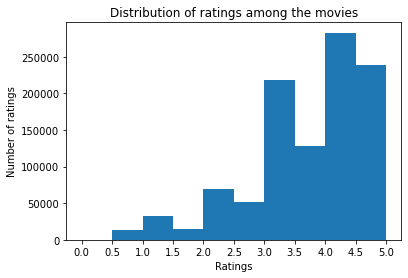

In [ ]:
#rating histogram
bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
plt.hist(ratings.rating, bins = bins)
plt.xticks(bins)
plt.ylabel('Number of ratings')
plt.xlabel('Ratings')
plt.title("Distribution of ratings among the movies")
plt.show()

In [27]:
df['Year'] = pd.DatetimeIndex(df['release_date']).year

In [28]:
conditions = [
        (df['Year']> 1891) & (df['Year']< 1901),
        (df['Year']> 1901) & (df['Year']< 1911),
        (df['Year']> 1911) & (df['Year']< 1921),
        (df['Year']> 1921) & (df['Year']< 1931),
        (df['Year']> 1931) & (df['Year']< 1941),
        (df['Year']> 1941) & (df['Year']< 1951),
        (df['Year']> 1951) & (df['Year']< 1961),
        (df['Year']> 1961) & (df['Year']< 1971),
        (df['Year']> 1971) & (df['Year']< 1981),
        (df['Year']> 1981) & (df['Year']< 1991),
        (df['Year']> 1991) & (df['Year']< 2001),
        (df['Year']> 2001) & (df['Year']< 2011),
        (df['Year']> 2011)]
choices = ['1891-1900','1901-1910','1911-1920', '1921-1930', '1931-1940','1941-1950', '1951-1960', '1961-1970','1971-1980', '1981-1990', '1991-2000','2001-2010', '2011>']
df['Years'] = np.select(conditions, choices, default = '2011>' )

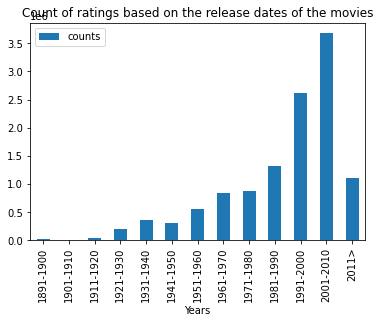

In [29]:
year =df.groupby(['Years']).size().reset_index(name='counts')
year.plot(x='Years', y='counts',kind='bar')
plt.title("Count of ratings based on the release dates of the movies")
plt.show()


In [ ]:
df['genres'] = df['genres'].apply(ast.literal_eval)

In [ ]:
df['genres'] =df['genres'].apply(lambda x: [y.get('name') for y in x])
df

In [ ]:
df[['genre1','genre2', 'genre3','genre4', 'genre5', 'genre5', 'genre6']] = pd.DataFrame(df.genres.tolist(), index= df.index)
df

,userId,id,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,imdb_id,...,vote_average,vote_count,Year,Years,genre1,genre2,genre3,genre4,genre5,genre6
0,1,110,1.0,1425941529,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[Drama, Mystery, Romance]",NaN,tt0111495,...,7.8,246.0,1994.0,1991-2000,Drama,Mystery,Romance,None,None,None
1,11,110,3.5,1231676989,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[Drama, Mystery, Romance]",NaN,tt0111495,...,7.8,246.0,1994.0,1991-2000,Drama,Mystery,Romance,None,None,None
2,22,110,5.0,1111937009,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[Drama, Mystery, Romance]",NaN,tt0111495,...,7.8,246.0,1994.0,1991-2000,Drama,Mystery,Romance,None,None,None
3,24,110,5.0,979870012,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[Drama, Mystery, Romance]",NaN,tt0111495,...,7.8,246.0,1994.0,1991-2000,Drama,Mystery,Romance,None,None,None
4,29,110,3.0,1044020005,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[Drama, Mystery, Romance]",NaN,tt0111495,...,7.8,246.0,1994.0,1991-2000,Drama,Mystery,Romance,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458535,10655,77910,5.0,1462270060,False,NaN,0,"[Drama, Romance]",http://forloversonlymovie.com/,tt1648201,...,7.2,10.0,2011.0,2011>,Drama,Romance,None,None,None,None
458536,10655,91333,3.5,1468050247,False,NaN,0,[Action],NaN,tt1839591,...,5.0,34.0,2011.0,2011>,Action,None,None,None,None,None
458537,10655,122787,4.0,1467798772,False,NaN,0,[Western],NaN,tt0063500,...,6.7,3.0,1967.0,1961-1970,Western,None,None,None,None,None
458538,10655,136339,2.5,1498577739,False,NaN,0,[Comedy],NaN,tt1295060,...,4.1,4.0,2008.0,2001-2010,Comedy,None,None,None,None,None


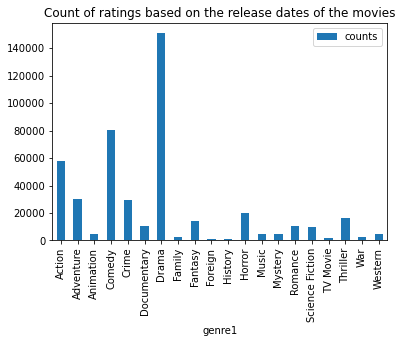

In [ ]:
genre =df.groupby(['genre1']).size().reset_index(name='counts')
genre.plot(x='genre1', y='counts',kind='bar')
plt.title("Count of ratings based on the genres of the movies")
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


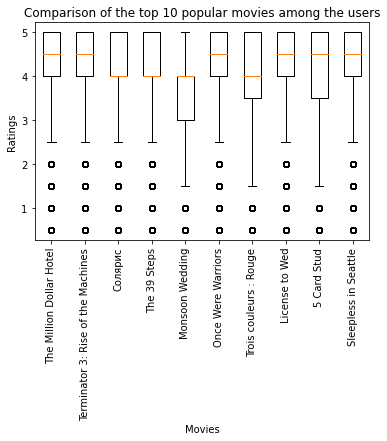

In [26]:
#Box and Whisker plot comparing the top 6 movies and their ratings
m_296= ratings.loc[ratings.id == '318']['rating']
m_318 = ratings.loc[ratings.id == '296']['rating']
m_593 = ratings.loc[ratings.id == '593']['rating']
m_260 = ratings.loc[ratings.id == '260']['rating']
m_480 = ratings.loc[ratings.id == '480']['rating']
m_527 = ratings.loc[ratings.id == '527']['rating']
m_110 = ratings.loc[ratings.id == '110']['rating']
m_608 = ratings.loc[ratings.id == '2959']['rating']
m_780 = ratings.loc[ratings.id == '4993']['rating']
m_588 = ratings.loc[ratings.id == '858']['rating']

labels = ['The Million Dollar Hotel', 'Terminator 3: Rise of the Machines','Солярис', 'The 39 Steps', 'Monsoon Wedding', 'Once Were Warriors', 'Trois couleurs : Rouge','License to Wed', "5 Card Stud",'Sleepless in Seattle']
plt.boxplot([m_296,m_318, m_593, m_260, m_480, m_527, m_110, m_608, m_780, m_588], labels = labels)
plt.xticks(rotation = 90)

plt.ylabel('Ratings')
plt.xlabel('Movies')
plt.title("Comparison of the top 10 popular movies among the users")
plt.show()